# Implemented in Google Colab and saved the model.
   

In [ ]:
#Data set link -https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

In [1]:
# Mounting drive inorder to unzip the data set in current colab environment
from google.colab import drive
drive.mount('/content/drive') #Specify your directory

# !unzip ("    ")  -unzips the zip data set from drive to colab inorder for colab to train model faster


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import numpy as np
import random
import os
import cv2 as cv
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential, load_model
from keras.layers import Conv2D, Dense, Flatten, Rescaling, AveragePooling2D, Dropout

# Image Preprocessing

In [4]:

images = []
labels = []
classes = 43

current_path = '/content/Train'

for i in range(classes):
    path = os.path.join(current_path, str(str(i)))
    img_folder = os.listdir(path)
    for j in img_folder:
        try:
            image = cv.imread(str(path+'/'+j))
            image = cv.resize(image, (32, 32))
            image = cv.cvtColor(image, cv.COLOR_BGR2GRAY) #Converting to grey scale for faster comoputation
            image = np.array(image)
            images.append(image)
            label = np.zeros(classes)
            label[i] = 1.0
            labels.append(label)
        except:
            pass

In [5]:
images = np.array(images)
images = images/255
labels = np.array(labels)
print('Images shape:', images.shape)
print('Labels shape:', labels.shape)

Images shape: (39209, 32, 32)
Labels shape: (39209, 43)


# Splitting into train and test sets

In [6]:

X = images.astype(np.float32)
y = labels.astype(np.float32)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train shape: (31367, 32, 32)
y_train shape: (31367, 43)
X_test shape: (7842, 32, 32)
y_test shape: (7842, 43)


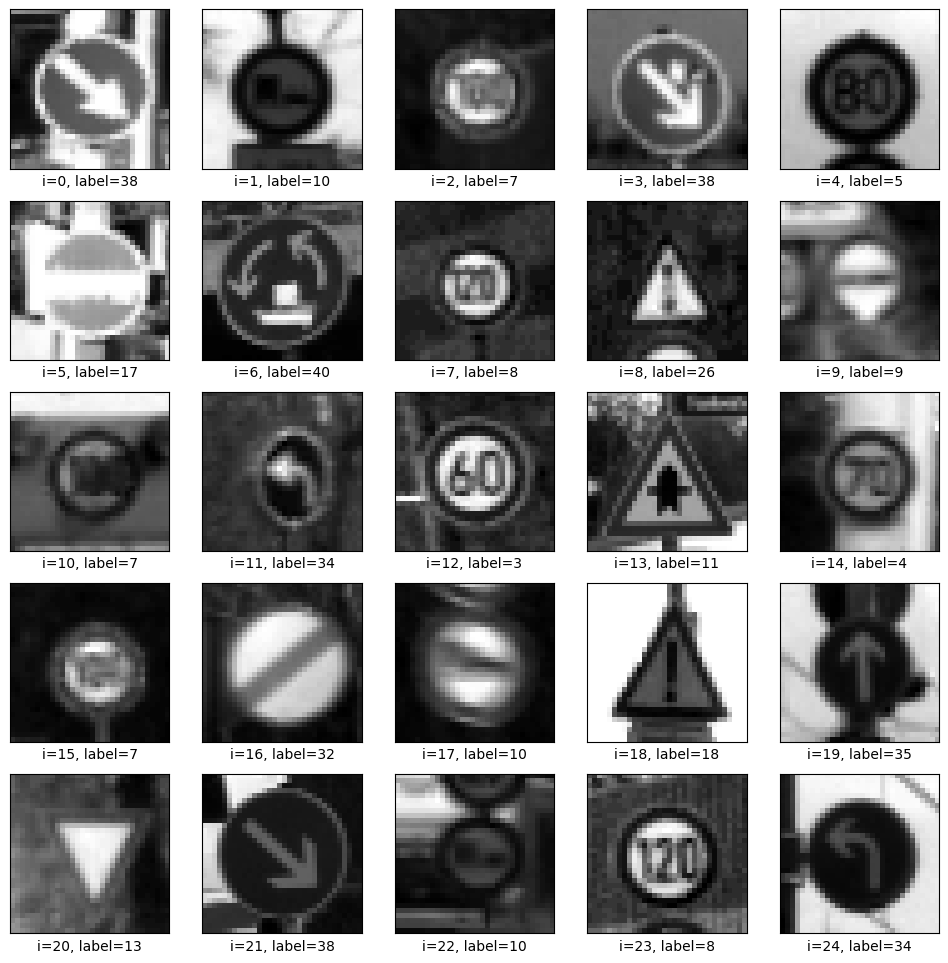

In [7]:

plt.figure(figsize=(12, 12))
start_index = 0
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    label = np.argmax(y_train[start_index+i])

    plt.xlabel('i={}, label={}'.format(start_index+i, label))
    plt.imshow(X_train[start_index+i], cmap='gray')
plt.show()


# Building the Lenet5 model with some tweaks.

In [8]:

model = Sequential([
    Rescaling(1, input_shape=(32, 32, 1)),
    Conv2D(filters=6, kernel_size=(5, 5), activation='relu'),
    AveragePooling2D(pool_size=(2, 2)),
    Conv2D(filters=16, kernel_size=(5, 5), activation='relu'),
    AveragePooling2D(pool_size=(2, 2)),
    Conv2D(filters=120, kernel_size=(5, 5), activation='relu'),
    Dropout(0.2),
    Flatten(),
    Dense(units=120, activation='relu'),
    Dense(units=43, activation='softmax')
])

# Compilation of the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Model architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 32, 32, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 conv2d_2 (Conv2D)           (None, 1, 1, 120)         4

# Training the Model

In [9]:


history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_test, y_test))


Epoch 1/10
981/981 [==============================] - 18s 17ms/step - loss: 1.9191 - accuracy: 0.4550 - val_loss: 0.7657 - val_accuracy: 0.7669
Epoch 2/10
981/981 [==============================] - 17s 18ms/step - loss: 0.6850 - accuracy: 0.7907 - val_loss: 0.4059 - val_accuracy: 0.8916
Epoch 3/10
981/981 [==============================] - 15s 16ms/step - loss: 0.4476 - accuracy: 0.8650 - val_loss: 0.2846 - val_accuracy: 0.9243
Epoch 4/10
981/981 [==============================] - 17s 17ms/step - loss: 0.3318 - accuracy: 0.9011 - val_loss: 0.1800 - val_accuracy: 0.9551
Epoch 5/10
981/981 [==============================] - 18s 18ms/step - loss: 0.2642 - accuracy: 0.9207 - val_loss: 0.1503 - val_accuracy: 0.9582
Epoch 6/10
981/981 [==============================] - 16s 16ms/step - loss: 0.2181 - accuracy: 0.9341 - val_loss: 0.1298 - val_accuracy: 0.9656
Epoch 7/10
981/981 [==============================] - 15s 16ms/step - loss: 0.1808 - accuracy: 0.9463 - val_loss: 0.1185 - val_accuracy:

In [10]:

val_loss, val_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nValifdation accuracy:', val_acc)
print('\nValidation loss:', val_loss)


246/246 - 1s - loss: 0.0813 - accuracy: 0.9801 - 1s/epoch - 5ms/step

Valifdation accuracy: 0.9801071286201477

Validation loss: 0.08127009123563766


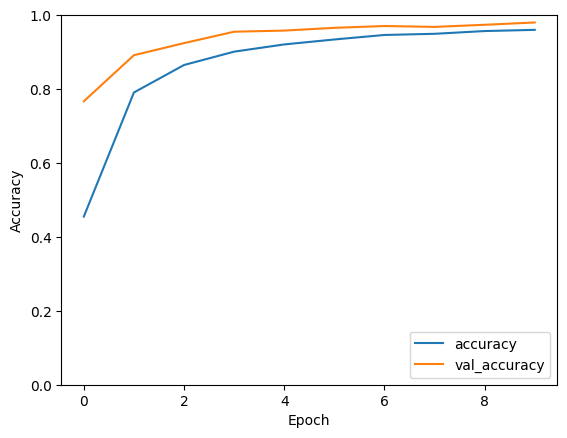

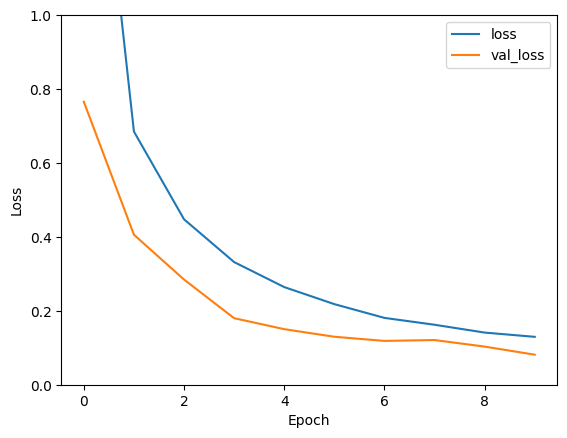

In [17]:

plt.figure(0)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

plt.figure(1)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend(loc='upper right');

# Prediciting on some samples

246/246 [==============================] - 1s 6ms/step


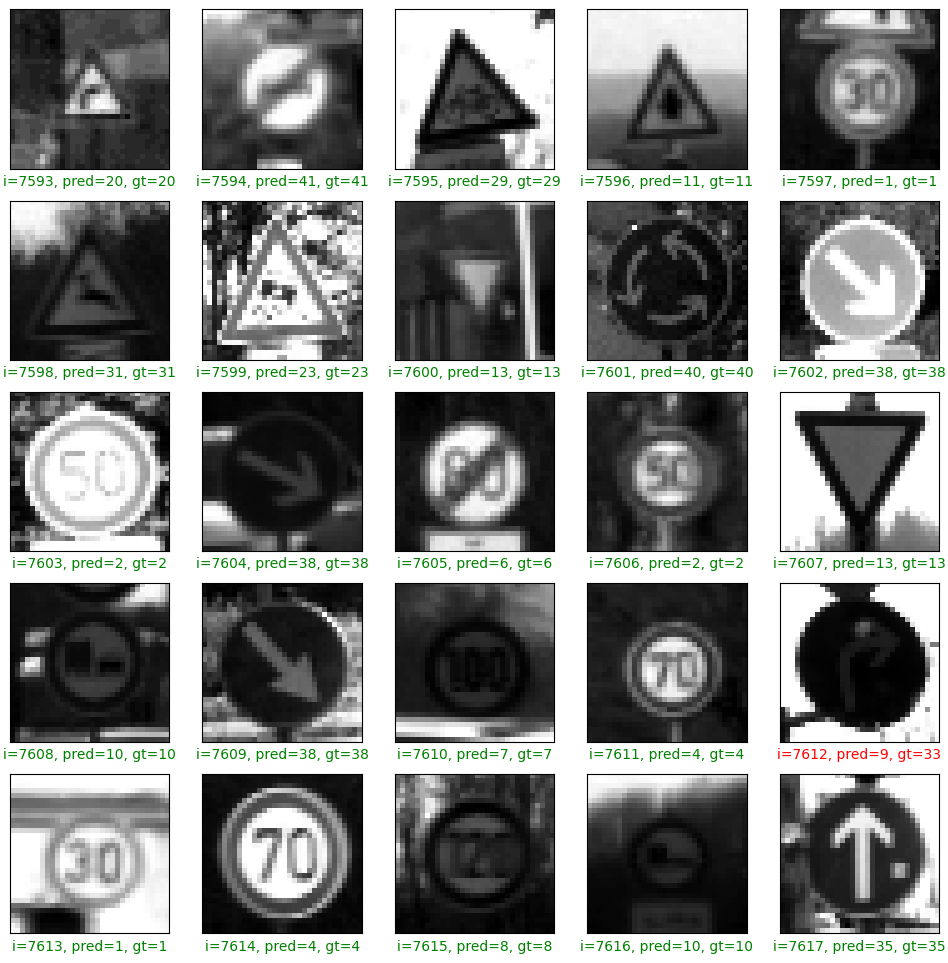

In [12]:

preds = model.predict(X_test)

plt.figure(figsize=(12, 12))
start_index = random.randint(0, 7800)
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    pred = np.argmax(preds[start_index+i])
    gt = np.argmax(y_test[start_index+i])

    col = 'g'
    if pred != gt:
        col = 'r'

    plt.xlabel('i={}, pred={}, gt={}'.format(start_index+i, pred, gt), color=col)
    plt.imshow(X_test[start_index+i], cmap='gray')
plt.show()

# Saved the model 

In [13]:
model.save('/content/gdrive/My Drive/keras_model/')